Author: **Rahul Sarma**

Last Updated: 25.03.2023

**Preparing the Environment**

In [21]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
print("import complete")

import complete


In [2]:
# import the data

food=pd.read_csv("/content/ifood_df.csv")
print("import complete")

import complete


**Assess Data** 

In this step, we view the dataset and get basic information.

In [3]:
# view first 5 rows

food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [4]:
# Basic information of dataset

food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

 **Handle Duplicates**

In [5]:
# Check for duplicates

food.duplicated().sum()

184

we drop the duplicate rows.

In [6]:
# Drop row and set inplace to True to reflect changes in dataset

food.drop_duplicates(inplace=True)

**Handle Missing Values** 

Using percentage to find missing values would give a clearer representation of the missing values in the dataset.

In [7]:
# Find percentage of null values

food.isnull().sum()/len(food)*100

Income                  0.0
Kidhome                 0.0
Teenhome                0.0
Recency                 0.0
MntWines                0.0
MntFruits               0.0
MntMeatProducts         0.0
MntFishProducts         0.0
MntSweetProducts        0.0
MntGoldProds            0.0
NumDealsPurchases       0.0
NumWebPurchases         0.0
NumCatalogPurchases     0.0
NumStorePurchases       0.0
NumWebVisitsMonth       0.0
AcceptedCmp3            0.0
AcceptedCmp4            0.0
AcceptedCmp5            0.0
AcceptedCmp1            0.0
AcceptedCmp2            0.0
Complain                0.0
Z_CostContact           0.0
Z_Revenue               0.0
Response                0.0
Age                     0.0
Customer_Days           0.0
marital_Divorced        0.0
marital_Married         0.0
marital_Single          0.0
marital_Together        0.0
marital_Widow           0.0
education_2n Cycle      0.0
education_Basic         0.0
education_Graduation    0.0
education_Master        0.0
education_PhD       

There is no null values in the dataset.

**Data Preparation**

Merge multiple columns containing marital status information into a single column. It involves converting the columns to strings, replacing the numerical values with categorical values, combining the columns into a new column, and mapping the values to the appropriate categories.

In [8]:
# Create a dictionary to map numerical values to categorical values
marital_map = {'1': 'Divorced', '2': 'Widow', '3': 'Together', '4': 'Single', '5': 'Married'}

# Convert columns to strings and replace numerical values
food['marital_Married'] = food['marital_Married'].astype(str).replace({'1': '5', '0': ''})
food['marital_Single'] = food['marital_Single'].astype(str).replace({'1': '4', '0': ''})
food['marital_Together'] = food['marital_Together'].astype(str).replace({'1': '3', '0': ''})
food['marital_Widow'] = food['marital_Widow'].astype(str).replace({'1': '2', '0': ''})
food['marital_Divorced'] = food['marital_Divorced'].astype(str).replace({'0': ''})

# Combine columns into a new column and map numerical values to categorical values
food['marital_status'] = food['marital_Widow'] + food['marital_Together'] + food['marital_Single'] + food['marital_Married'] + food['marital_Divorced']
food['marital_status'] = food['marital_status'].map(marital_map)


Let's do same operation, as above, for education columns.

In [9]:
education_map= {'1':'2n Cycle','2':'Basic','3':'Graduation','4':'Master','5':'PhD'}
food['education_2n Cycle']= food['education_2n Cycle'].astype(str).replace({'0':''})
food['education_Basic']= food['education_Basic'].astype(str).replace({'1':'2','0':''})
food['education_Graduation']= food['education_Graduation'].astype(str).replace({'1':'3','0':''})
food['education_Master']= food['education_Master'].astype(str).replace({'1':'4','0':''})
food['education_PhD']= food['education_PhD'].astype(str).replace({'1':'5','0':''})
food['education_level']= food['education_2n Cycle']+ food['education_Basic']+ food['education_Graduation']+ food['education_Master']+ food['education_PhD']
food['education_level']= food['education_level'].map(education_map)

**Create Calculated Field**

In [10]:
# join KidHome And TeenHome to find out number of children in a house

food['kids']=food['Kidhome']+ food['Teenhome']

**Drop unnecessary columns**

In [11]:
food=food.drop(['education_2n Cycle','education_Basic','education_Graduation','education_Master','education_PhD','marital_Widow','marital_Together','marital_Single','marital_Married','marital_Divorced','Kidhome','Teenhome'], axis=1)
food.head(3)

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Z_Revenue,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids
0,58138.0,58,635,88,546,172,88,88,3,8,...,11,1,63,2822,1529,1441,0,Single,Graduation,0
1,46344.0,38,11,1,6,2,1,6,2,1,...,11,0,66,2272,21,15,0,Single,Graduation,2
2,71613.0,26,426,49,127,111,21,42,1,8,...,11,0,55,2471,734,692,0,Together,Graduation,0


In [12]:
# shape of the new restructured data

food.shape

(2021, 30)

**Exploratory Data Analysis**

In [13]:
# education level counts

food.education_level.value_counts()

Graduation    1015
PhD            439
Master         335
2n Cycle       183
Basic           49
Name: education_level, dtype: int64

In the given dataset, people are mainly graduated followed by PHD and Master degree.

In [14]:
food.marital_status.value_counts()

Married     785
Together    509
Single      443
Divorced    214
Widow        70
Name: marital_status, dtype: int64

Most of the people are 'Married' followed by people who are 'Together' and 'Single'. There are very less people who are either 'Divorced' and 'Widow' in this dataset.

In [15]:
food['Income'].describe().round(2)

count      2021.00
mean      51687.26
std       20713.05
min        1730.00
25%       35416.00
50%       51412.00
75%       68274.00
max      113734.00
Name: Income, dtype: float64

From the above descriptive analysis, we find:

- mean income: 51687.26

- The 75th percentile (Q3) is 68274.00, which means that 75% of the data points are below this value, and 25% are above it.

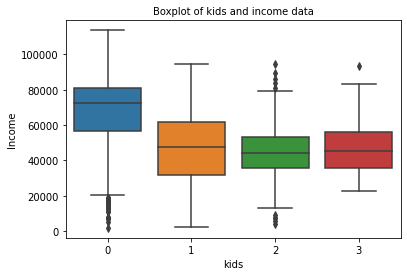

In [16]:
# plot income and kids data

sns.boxplot(y=food["Income"], x=food["kids"])
plt.title("Boxplot of kids and income data", size=10)
plt.show()

People having no kid tend to have higher salaries than those having kids.

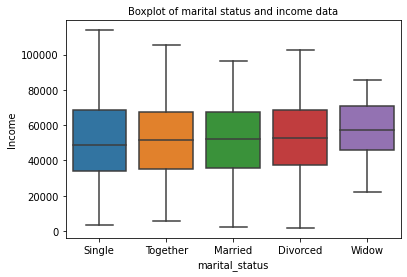

In [17]:
sns.boxplot(y=food["Income"], x=food["marital_status"])
plt.title("Boxplot of marital status and income data", size=10)
plt.show()

There's not much variation in income by marital status.

In [18]:
food.NumDealsPurchases.mean().round(), food.NumWebPurchases.mean().round()

(2.0, 4.0)

<Axes: >

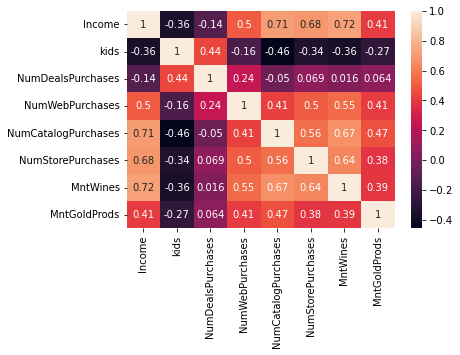

In [19]:
# plot heatmap to view correlation

data=food[["Income","kids","NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases", "MntWines", "MntGoldProds"]]
sns.heatmap(data.corr(), annot=True)

We find the following:

- Income is strongly related with Number of catalog and store purchases.
- NumDealsPurchases(number of purchases made with discounts) and kids(number of kids at home) is correlated.

**More EDA**

- Start by identifying the most profitable customers: Look at the 
historical data and identify the customers who have spent the most on the products. This will give an idea of the type of customers that are more likely to bring in revenue.

In [31]:
# create new calculated column
food['Total_Spending'] = food[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Sort the customers by the amount they have spent
food.sort_values(by='Income', ascending=False, inplace=True)

# Select the top 10% of customers by income
top_customers = food.head(int(len(food) * 0.1))

# create DataFrame from list of top customers
df_top_customers = pd.DataFrame(top_customers, columns=["Total_Spending", "Income", "NumDealsPurchases"])

# display top 10 customers
pprint(df_top_customers.head(10))




      Total_Spending    Income  NumDealsPurchases
1872             277  113734.0                  0
628             1724  105471.0                  0
238             1112  102692.0                  1
190             1240  102160.0                  0
115             1135  101970.0                  0
632             2008   98777.0                  0
1986            1941   96876.0                  1
1932            1544   96843.0                  1
1969             809   96547.0                  0
894             1990   95529.0                  1


- Segment the customers: Use the demographic and behavior data available to group the customers into different segments. We use clustering algorithms to group similar customers together.

In [47]:
# Use k-means clustering to group similar customers together
from sklearn.cluster import KMeans

# Select the columns to use for clustering
cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age']

# Fit the k-means model to the data
kmeans = KMeans(n_clusters=4, random_state=0).fit(food[cols])

# Add the cluster labels to the dataframe
food['Cluster'] = kmeans.labels_

# Display the clusters
print(food.groupby('Cluster').mean())


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


               Income    Recency    MntWines  MntFruits  MntMeatProducts  \
Cluster                                                                    
0        77212.004926  50.679803  534.748768  70.246305       656.886700   
1        36925.122921  48.929760   57.584104   8.515712        34.168207   
2        72855.074380  48.946281  991.342975  44.227273       322.305785   
3        63161.947368  48.002024  422.380567  38.676113       176.702429   

         MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
Cluster                                                                       
0             105.743842         72.482759     73.581281           1.236453   
1              11.727357          8.292052     20.836414           2.239372   
2              61.500000         44.041322     70.752066           2.268595   
3              54.572874         42.036437     69.153846           3.008097   

         NumWebPurchases  ...  Z_CostContact  Z_Revenue  Response   

- Analyze the behavior of each segment: Once the segments are identified, look at the behavior of each segment. For example, look at the products they have purchased, how frequently they make purchases, the channels they prefer to use for purchasing, and the promotions they respond to. This will help you understand the needs and preferences of each segment.

In [48]:
# Display the products and services purchased by each segment
segments = food.groupby('Cluster').mean()
for i in range(len(segments)):
    print(f'Segment {i+1}:')
    print(segments.iloc[i][cols])


Segment 1:
MntWines               534.748768
MntFruits               70.246305
MntMeatProducts        656.886700
MntFishProducts        105.743842
MntSweetProducts        72.482759
MntGoldProds            73.581281
NumDealsPurchases        1.236453
NumWebPurchases          4.862069
NumCatalogPurchases      6.300493
NumStorePurchases        8.073892
NumWebVisitsMonth        2.512315
Age                     50.980296
Name: 0, dtype: float64
Segment 2:
MntWines               57.584104
MntFruits               8.515712
MntMeatProducts        34.168207
MntFishProducts        11.727357
MntSweetProducts        8.292052
MntGoldProds           20.836414
NumDealsPurchases       2.239372
NumWebPurchases         2.546211
NumCatalogPurchases     0.756007
NumStorePurchases       3.635860
NumWebVisitsMonth       6.297597
Age                    49.225508
Name: 1, dtype: float64
Segment 3:
MntWines               991.342975
MntFruits               44.227273
MntMeatProducts        322.305785
MntFishProduc

- Develop targeted marketing strategies: Based on the insights gathered from the analysis, develop marketing strategies that target each segment specifically. For example, you could develop personalized email campaigns, targeted social media advertising, or tailored promotions for each segment.

In [56]:
# Develop marketing strategies that target each segment specifically
# for segment 3, we might develop a personalized email campaign with promotions on wine

Note:

- Dataset: [marketing analytics dataset](https://www.kaggle.com/datasets/jackdaoud/marketing-data)
- Notebook: Google Colab

**Thank you for going through my analysis.**